In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, average_precision_score

import scikitplot as skplt
from scikitplot.helpers import binary_ks_curve

#### Carregando os datasets

In [2]:
dt_train = pd.read_csv('../data/raw_data/test.csv')
dt_test = pd.read_csv('../data/raw_data/train.csv')

In [3]:
df = pd.concat([dt_train, dt_test], ignore_index=False)

In [4]:
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

#### Tratando variáveis categoricas e valores NaN

#### Tratando valores NaN


In [5]:
# Substituindo os valores NaN pela media dos valores da coluna no dataset de treino
mean_value = df['Arrival Delay in Minutes'].mean()
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(mean_value)

#### Tratando variáveis categoricas

In [7]:
df['Gender'] = df['Gender'].apply(lambda val: 1 if val == 'Female' else 0)
df['Customer Type'] = df['Customer Type'].apply(lambda val: 1 if val == 'Loyal Customer' else 0)
df['Class'] = df['Class'].apply(lambda val: 1 if val == 'Business' else 2 if val == 'Eco Plus' else 0)
df['Type of Travel'] = df['Type of Travel'].apply(lambda val: 1 if val == 'Business travel' else 0)
df['satisfaction'] = df['satisfaction'].apply(lambda val: 1 if val == 'satisfied' else 0)


#### Inicialmente iremos analisar a matriz de correlação

In [8]:
correlation_matrix = df.corr()

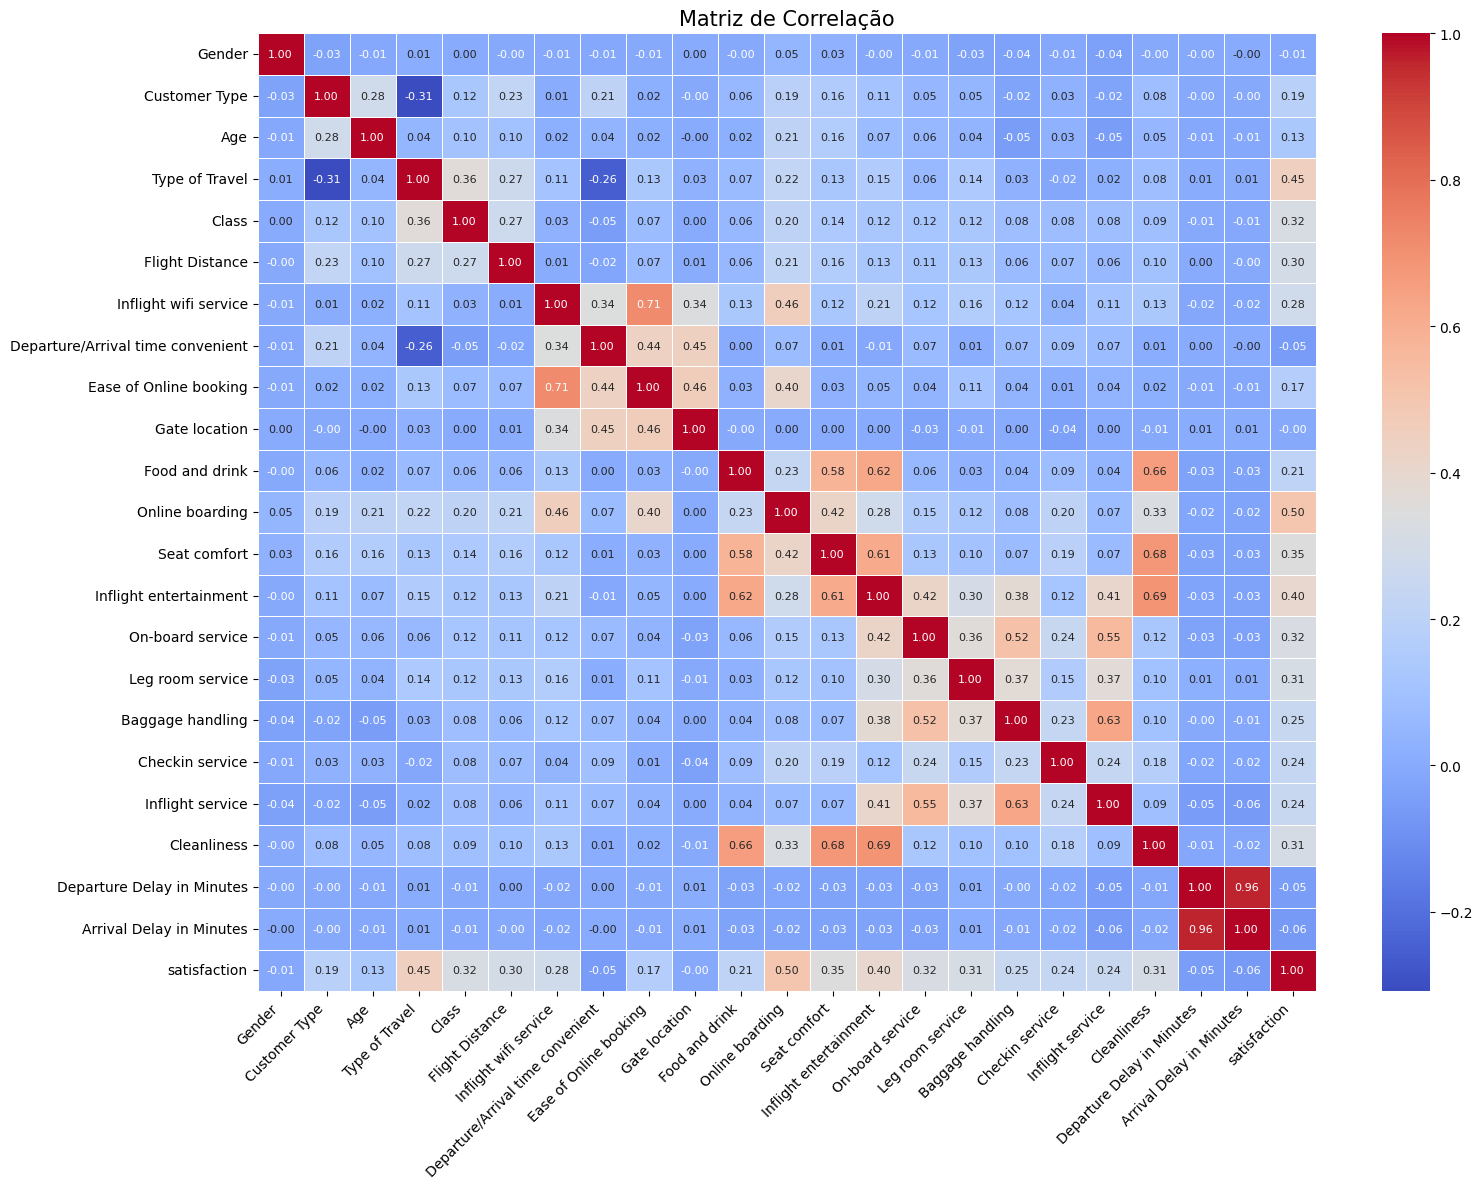

In [9]:
# Plotar a matriz de correlação com ajustes
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(correlation_matrix, 
                      annot=True, 
                      cmap='coolwarm', 
                      linewidths=0.5, 
                      fmt=".2f",
                      annot_kws={"size": 8})

# Ajustar os rótulos dos eixos
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)

# Título do gráfico
plt.title('Matriz de Correlação', fontsize=15)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

In [10]:
# Calcular a correlação das variáveis com a variável alvo 'satisfaction'
correlation_with_target = df.corr()['satisfaction'].sort_values(ascending=False)

# Filtrar as correlações para incluir apenas variáveis que não sejam a variável alvo
correlation_with_target = correlation_with_target.drop(labels=['satisfaction'])

/tmp/ipykernel_25817/2995388958.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='coolwarm')


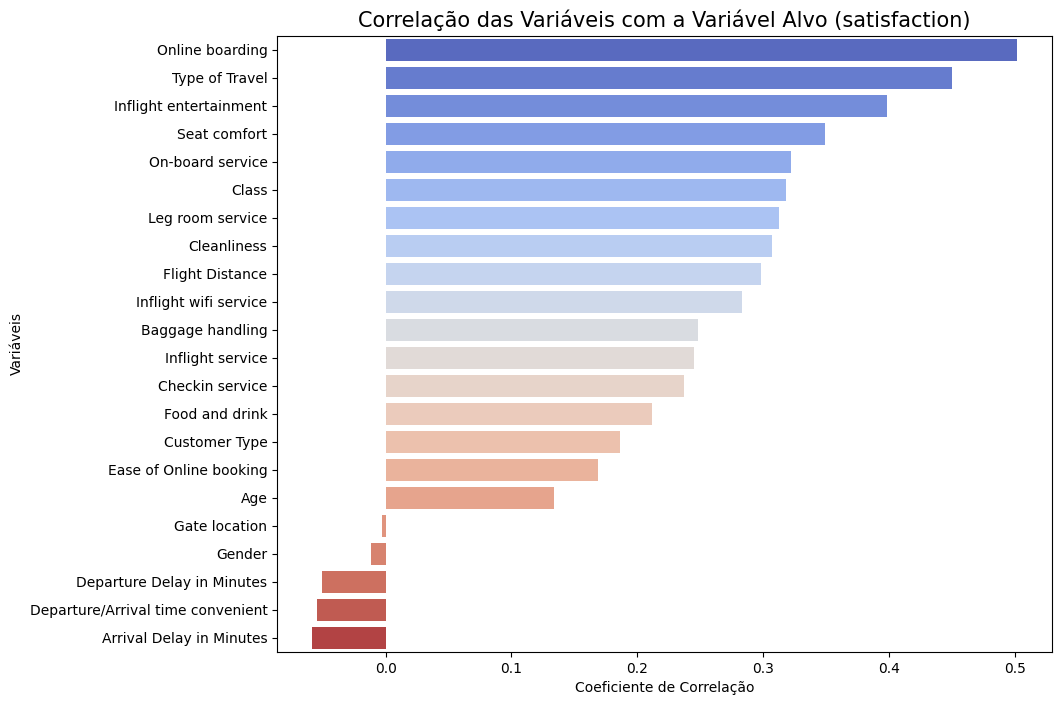

In [11]:
# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='coolwarm')
plt.title('Correlação das Variáveis com a Variável Alvo (satisfaction)', fontsize=15)
plt.xlabel('Coeficiente de Correlação')
plt.ylabel('Variáveis')
plt.show()

Variáveis que podem ser retiradas a fim de deixar o modelo mais simples: Age, Gate Location, Gender, Departure Delay in Minutes (Alta correlação com Arrival Dealy in minutes), Departure/Arrival time convenient

In [13]:
def find_highly_correlated_features(df, threshold=0.8):

    # threshold (float): O limiar para considerar uma correlação alta. Valor absoluto.
    
    correlation_matrix = df.corr().abs()
    upper_triangle_matrix = correlation_matrix.where(
        np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
    )
    
    highly_correlated_pairs = [
        (column, idx, upper_triangle_matrix.loc[column, idx])
        for column in upper_triangle_matrix.columns
        for idx in upper_triangle_matrix.index
        if not pd.isnull(upper_triangle_matrix.loc[column, idx]) and upper_triangle_matrix.loc[column, idx] > threshold
    ]
    
    return highly_correlated_pairs


highly_correlated_features = find_highly_correlated_features(df, threshold=0.8)


highly_correlated_features

[('Departure Delay in Minutes',
  'Arrival Delay in Minutes',
  0.9603293850174388)]